In [1]:
import explogreg
import torch
from pyro.infer import MCMC, NUTS
import pyro.optim as optim

%load_ext autoreload
%autoreload 2

/Users/elenab/Library/r-miniconda-arm64/envs/lineagt-env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.manual_seed(0)
L = 3
T = 5 # 6  # Number of time points
# x = torch.linspace(0, 10, T).reshape((T,1))  # Time variable
x = torch.tensor([56,84,112,168,280]).unsqueeze(1)  # Time variable

# y = torch.tensor([[0, 138, 188, 565, 572, 539], [0, 238, 548, 793, 649, 629], [0, 28, 128, 283, 405, 486]]).T  # Simulated binary outcomes (logistic regression)
y = torch.tensor([[138, 188, 565, 572, 539], [238, 548, 793, 649, 629], [28, 128, 283, 405, 486]]).T  # Simulated binary outcomes (logistic regression)

In [3]:
print(x)
print(y)

tensor([[ 56],
        [ 84],
        [112],
        [168],
        [280]])
tensor([[138, 238,  28],
        [188, 548, 128],
        [565, 793, 283],
        [572, 649, 405],
        [539, 629, 486]])


In [4]:
obj = explogreg.Regression(x, y)
# mcmc_exp = obj.train_mcmc(regr="exp")
mcmc_log = obj.train_mcmc(regr="log")

# Get posterior samples
# posterior_samples_exp = mcmc_exp.get_samples()
posterior_samples_log = mcmc_log.get_samples()

Warmup [1]:   0%|          | 0/1500 [00:00, ?it/s]

Warmup [1]:   1%|          | 9/1500 [00:04,  1.41it/s, step size=4.23e-03, acc. prob=0.624]

Warmup [1]:   1%|          | 15/1500 [00:08,  1.80it/s, step size=7.51e-03, acc. prob=0.705]


Warmup [1]:   1%|▏         | 20/1500 [00:12,  1.59it/s, step size=4.46e-03, acc. prob=0.717]

Warmup [1]:   2%|▏         | 23/1500 [00:15,  1.27it/s, step size=2.65e-02, acc. prob=0.753]

Warmup [1]:   2%|▏         | 25/1500 [00:16,  1.31it/s, step size=5.35e-03, acc. prob=0.733]


Warmup [1]:   2%|▏         | 26/1500 [00:17,  1.08it/s, step size=9.56e-03, acc. prob=0.743]

Warmup [1]:   2%|▏         | 28/1500 [00:20,  1.04s/it, step size=2.65e-03, acc. prob=0.730]


Warmup [1]:   2%|▏         | 31/1500 [00:22,  1.07it/s, step size=4.77e-03, acc. prob=0.742]

Warmup [1]:   2%|▏         | 32/1500 [00:24,  1.11s/it, step size=7.97e-03, acc. prob=0.749]


Warmup [1]:   2%|▏         | 35/1500 [00:26,  1.41it/s, step size=3.79e-03, acc. prob=0.745]

Warmu

In [5]:
# mcmc_exp.summary()
mcmc_log.summary()


                   mean       std    median      5.0%     95.0%     n_eff     r_hat
carr_capac[0]    515.03      0.03    515.02    515.00    515.06       nan      1.00
carr_capac[1]    886.30    213.28    776.60    714.01   1278.79       nan      1.00
carr_capac[2]    499.85     97.66    458.04    438.01    652.93       nan      1.00
   fitness[0]     41.79      1.98     41.81     38.75     45.36       nan      1.00
   fitness[1]      0.07      0.03      0.07      0.02      0.11       nan      1.00
   fitness[2]      0.08      0.04      0.08      0.02      0.15       nan      1.00
 init_time[0]     55.94      0.05     55.95     55.87     56.00       nan      1.00
 init_time[1]     19.31     13.31     16.76      1.01     38.87       nan      1.00
 init_time[2]     32.95     15.71     35.08      9.45     55.94       nan      1.00
   sigma[0,0]      0.82      0.64      0.69      0.00      1.70       nan      1.00
   sigma[0,1]      0.89      0.63      0.77      0.00      1.77       nan  

/Users/elenab/Library/r-miniconda-arm64/envs/lineagt-env/lib/python3.8/site-packages/pyro/infer/mcmc/util.py:498: UserWarning: Traceback (most recent call last):
  File "/Users/elenab/Library/r-miniconda-arm64/envs/lineagt-env/lib/python3.8/site-packages/pyro/infer/mcmc/util.py", line 496, in wrapped
    val = fn(sample, *args, **kwargs)
  File "/Users/elenab/Library/r-miniconda-arm64/envs/lineagt-env/lib/python3.8/site-packages/pyro/ops/stats.py", line 189, in effective_sample_size
    gamma_k_c = autocovariance(input, dim=0)  # N x C x sample_shape
  File "/Users/elenab/Library/r-miniconda-arm64/envs/lineagt-env/lib/python3.8/site-packages/pyro/ops/stats.py", line 137, in autocovariance
    return autocorrelation(input, dim) * input.var(dim, unbiased=False, keepdim=True)
  File "/Users/elenab/Library/r-miniconda-arm64/envs/lineagt-env/lib/python3.8/site-packages/pyro/ops/stats.py", line 97, in autocorrelation
    raise NotImplementedError(
NotImplementedError: For CPU tensor, this me

# Exponential

In [6]:
# import seaborn as sns
# for k, v in posterior_samples_exp.items():
#     print(k)
#     sns.displot(v.numpy())

In [7]:
# import matplotlib.pyplot as plt

# # Generate new x values (e.g., test points for prediction)
# x_test = torch.linspace(0, 10, T)

# args = posterior_samples_exp["fitness"][:, None] * x_test.unsqueeze(1)
# y_preds = torch.exp(args)

# # Compute predictions for each posterior sample
# y_mean = y_preds.mean(dim=0)  # Mean prediction
# y_lower = torch.quantile(y_preds, 0.025, dim=0)  # 2.5% quantile (
# y_upper = torch.quantile(y_preds, 0.975, dim=0)  # 97.5% quantile (upper bound)

# # Plot results
# plt.figure(figsize=(8, 5))
# plt.scatter(x.squeeze(), y[:,0], color="black", label="Observed Data")  # Scatter plot of actual data
# plt.plot(x_test, y_mean[:,0], label="Mean Prediction", color="blue")
# plt.fill_between(x_test, y_lower[:,0], y_upper[:,0], color="blue", alpha=0.3, label="95% Credible Interval")
# plt.xlabel("Time")
# plt.ylabel("Probability")
# plt.legend()
# plt.title("Bayesian Logistic Regression with 95% Credible Intervals")
# plt.show()

# Logistic

carr_capac
fitness
init_time
sigma


ValueError: Must pass 2-d input. shape=(3000, 5, 3)

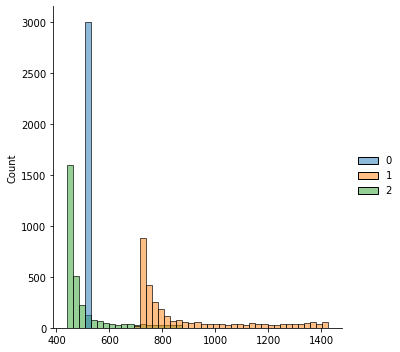

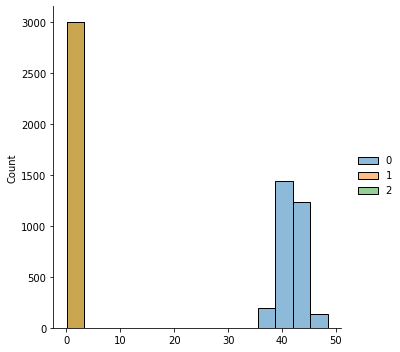

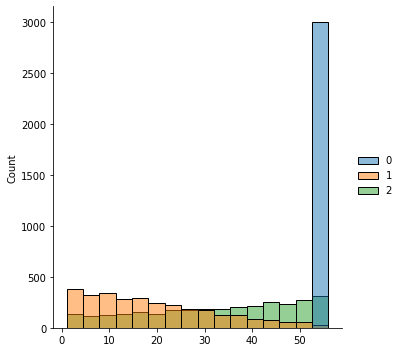

In [8]:
import seaborn as sns
for k, v in posterior_samples_log.items():
    print(k)
    sns.displot(v.numpy())

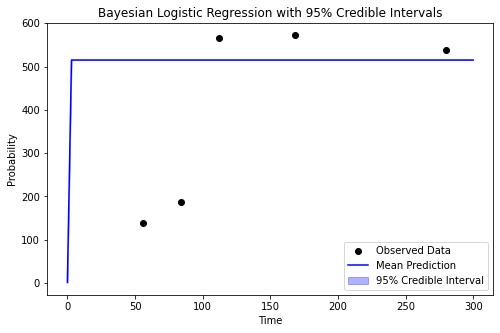

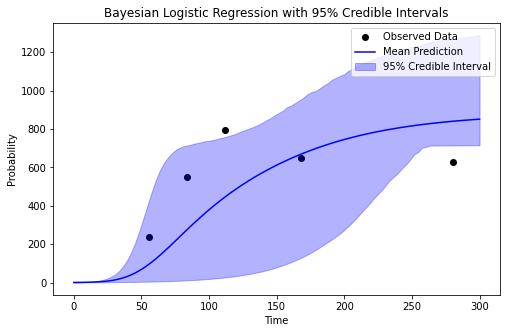

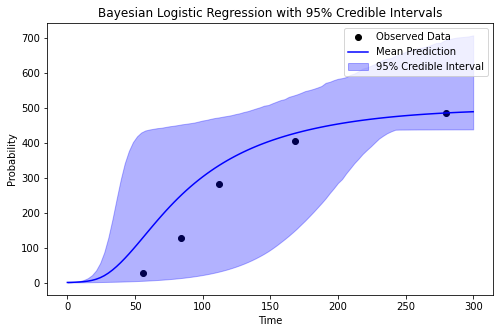

In [9]:
import matplotlib.pyplot as plt

# Generate new x values (e.g., test points for prediction)
x_test = torch.linspace(0, 300, 100)

args = - posterior_samples_log["fitness"][:, None] * x_test.unsqueeze(1)
y_preds = posterior_samples_log["carr_capac"][:, None] / ( 1 + (posterior_samples_log["carr_capac"][:, None] - 1) * torch.exp(args) )

# Compute predictions for each posterior sample
y_mean = y_preds.mean(dim=0)  # Mean prediction
y_lower = torch.quantile(y_preds, 0.05, dim=0)  # 2.5% quantile (
y_upper = torch.quantile(y_preds, 0.95, dim=0)  # 97.5% quantile (upper bound)

# Plot results

for i in range(L):
    plt.figure(figsize=(8, 5))
    plt.scatter(x.squeeze(), y[:,i], color="black", label="Observed Data")  # Scatter plot of actual data
    plt.plot(x_test, y_mean[:,i], label="Mean Prediction", color="blue")
    plt.fill_between(x_test, y_lower[:,i], y_upper[:,i], color="blue", alpha=0.3, label="95% Credible Interval")
    plt.xlabel("Time")
    plt.ylabel("Probability")
    plt.legend()
    plt.title("Bayesian Logistic Regression with 95% Credible Intervals")
    plt.show()